In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/mnt/data/patients.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/patients.csv'

In [4]:
from google.colab import files
uploaded = files.upload()


Saving patients.csv to patients (1).csv


In [5]:
import pandas as pd

df = pd.read_csv('patients.csv')   # No /mnt/data needed in Colab
df.head()


,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76


In [6]:
print(df.head())
print(df.columns)

     patient_id               name  age arrival_date departure_date  \
0  PAT-09484753  Richard Rodriguez   24   2025-03-16     2025-03-22   
1  PAT-f0644084     Shannon Walker    6   2025-12-13     2025-12-14   
2  PAT-ac6162e4       Julia Torres   24   2025-06-29     2025-07-05   
3  PAT-3dda2bb5    Crystal Johnson   32   2025-10-12     2025-10-23   
4  PAT-08591375        Garrett Lin   25   2025-02-18     2025-02-25   

            service  satisfaction  
0           surgery            61  
1           surgery            83  
2  general_medicine            83  
3         emergency            81  
4               ICU            76  
Index(['patient_id', 'name', 'age', 'arrival_date', 'departure_date',
       'service', 'satisfaction'],
      dtype='object')


In [7]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['departure_date'] = pd.to_datetime(df['departure_date'])
df['stay_days'] = (df['departure_date'] - df['arrival_date']).dt.days

In [9]:
df = df.drop(columns=['patient_id', 'name', 'arrival_date', 'departure_date'])

In [10]:
X = df.drop('service', axis=1)
y = df['service']

In [11]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (700, 3)
Validation: (150, 3)
Test: (150, 3)


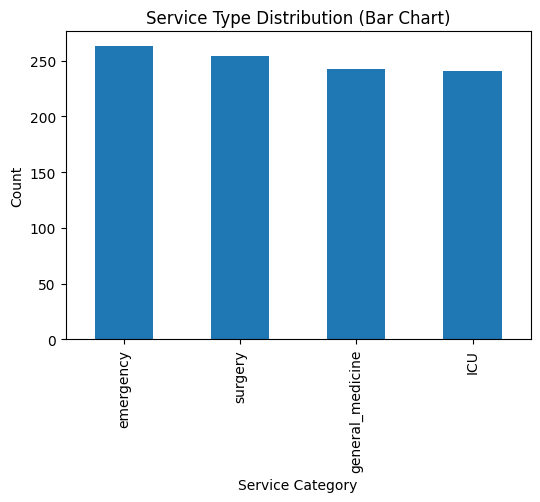

In [13]:
service_counts = df['service'].value_counts()

plt.figure(figsize=(6,4))
service_counts.plot(kind='bar')
plt.title('Service Type Distribution (Bar Chart)')
plt.xlabel('Service Category')
plt.ylabel('Count')
plt.show()

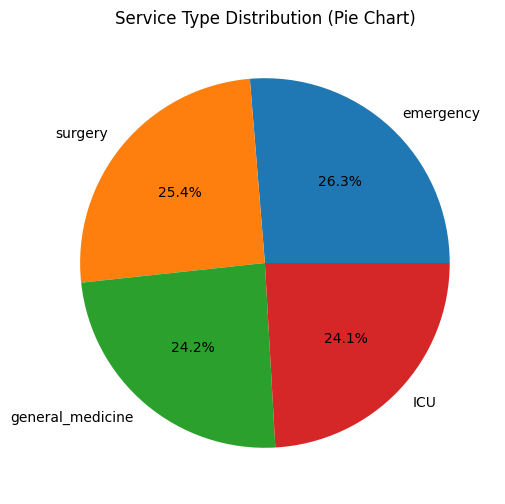

In [15]:
plt.figure(figsize=(6,6))
service_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Service Type Distribution (Pie Chart)')
plt.ylabel('')
plt.show()